<a href="https://colab.research.google.com/github/martz84/No_Supervisado/blob/main/NoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=====================================**MAESTRÍA INTELIGENCIA ARTIFICIAL APLICADA**===============================:

### ===========================Algoritmos No Supervisados============================


Profesora: Ruth Reátegui

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
os.chdir('..')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import copy

data = pd.read_csv('/content/drive/MyDrive/UTPL/Metodos de ML/dataTrigo.csv', delimiter=';', encoding='unicode_escape',)


El dataset está formado por granos pertenecientes a tres variedades diferentes de trigo: Kama, Rosa y Canadiense, 70 elementos cada uno, seleccionados al azar. Se detectó una visualización de alta calidad de la estructura interna del núcleo mediante una técnica de rayos X suaves. Las imágenes se registraron en placas de rayos X KODAK de 13x18 cm. Los estudios se llevaron a cabo utilizando granos de trigo cosechados en campos experimentales, explorados en el Instituto de Agrofísica de la Academia Polaca de Ciencias en Lublin.

Para construir los datos, se midieron siete parámetros geométricos de los granos de trigo:

1. area A,

2. perimeter P,

3. compactness C = 4*pi*A/P^2,

4. length of kernel,

5. width of kernel,

6. asymmetry coefficient

7. length of kernel groove.

Todos los parametros tienen valores reales continuos.

In [4]:
data.shape

(210, 8)

In [5]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,NaN,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,0.000,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [ ]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,209.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.561531,0.870999,5.602724,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.308688,0.023629,0.589074,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,0.000000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.253000,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.350000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.730000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       209 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


=======================================

### Visualización de datos

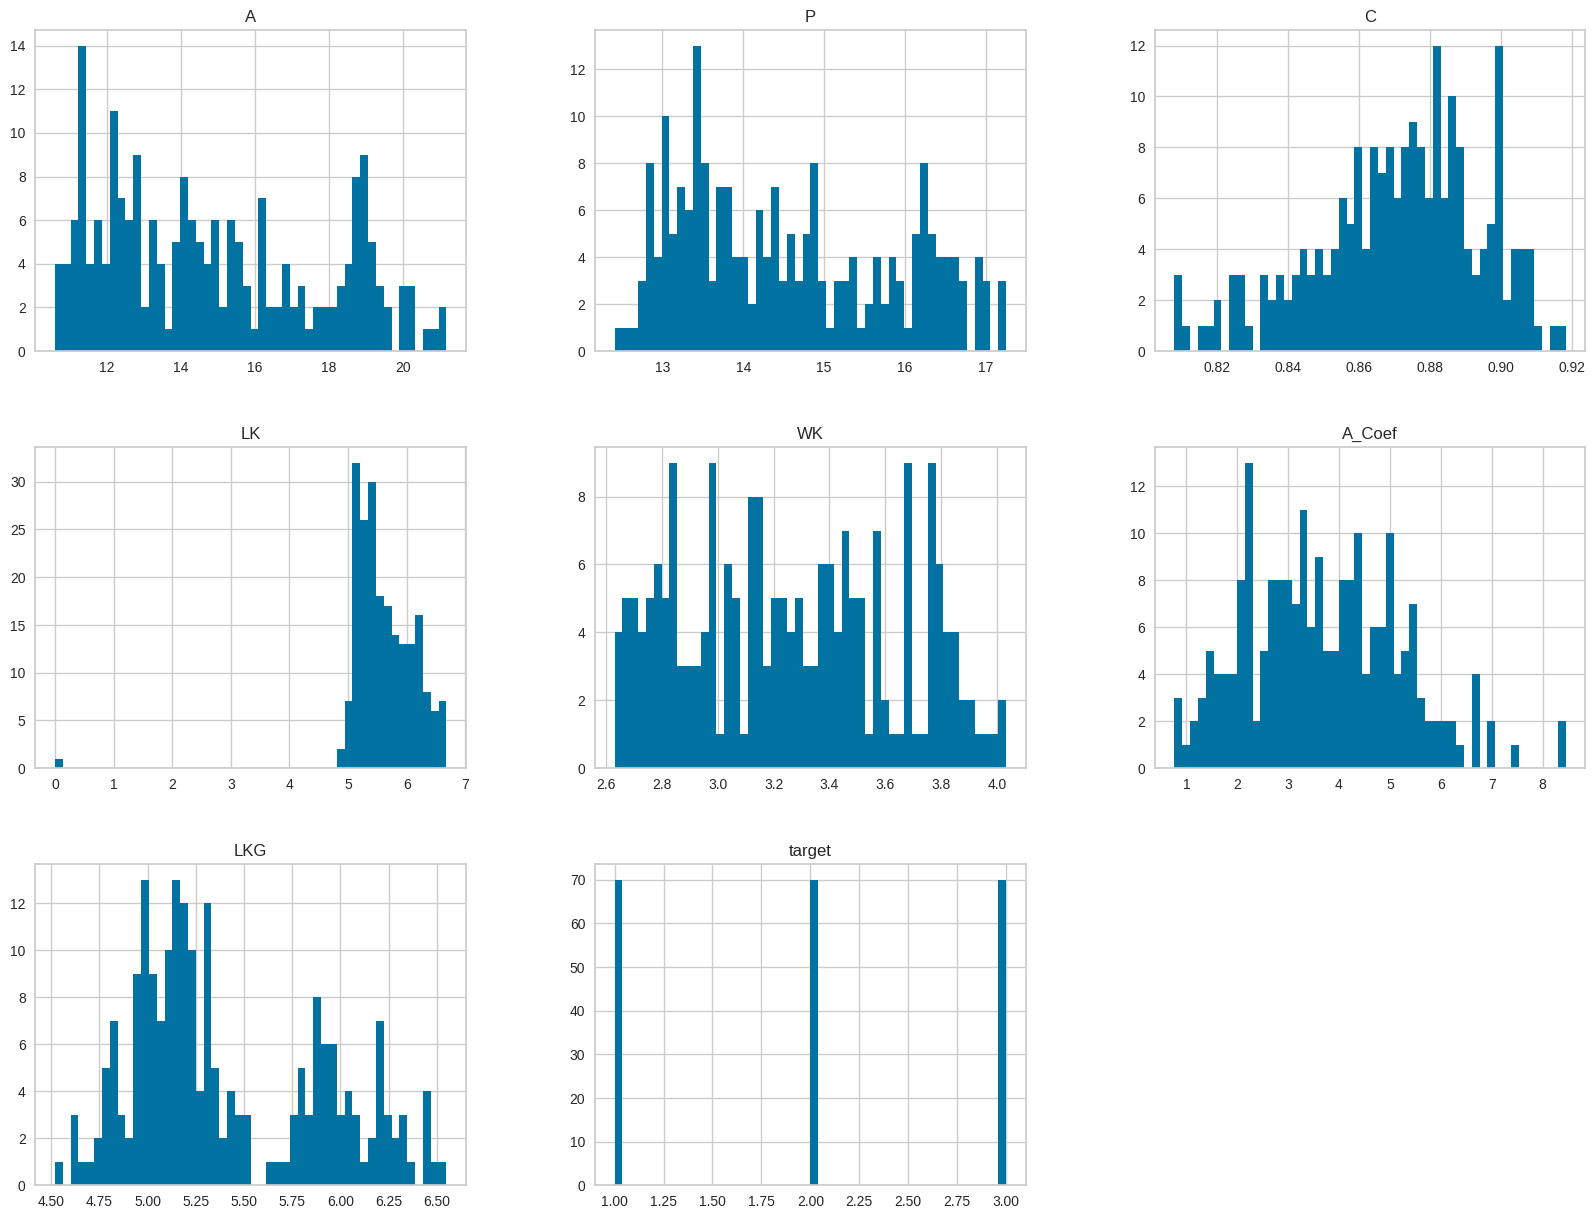

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import seaborn as sns


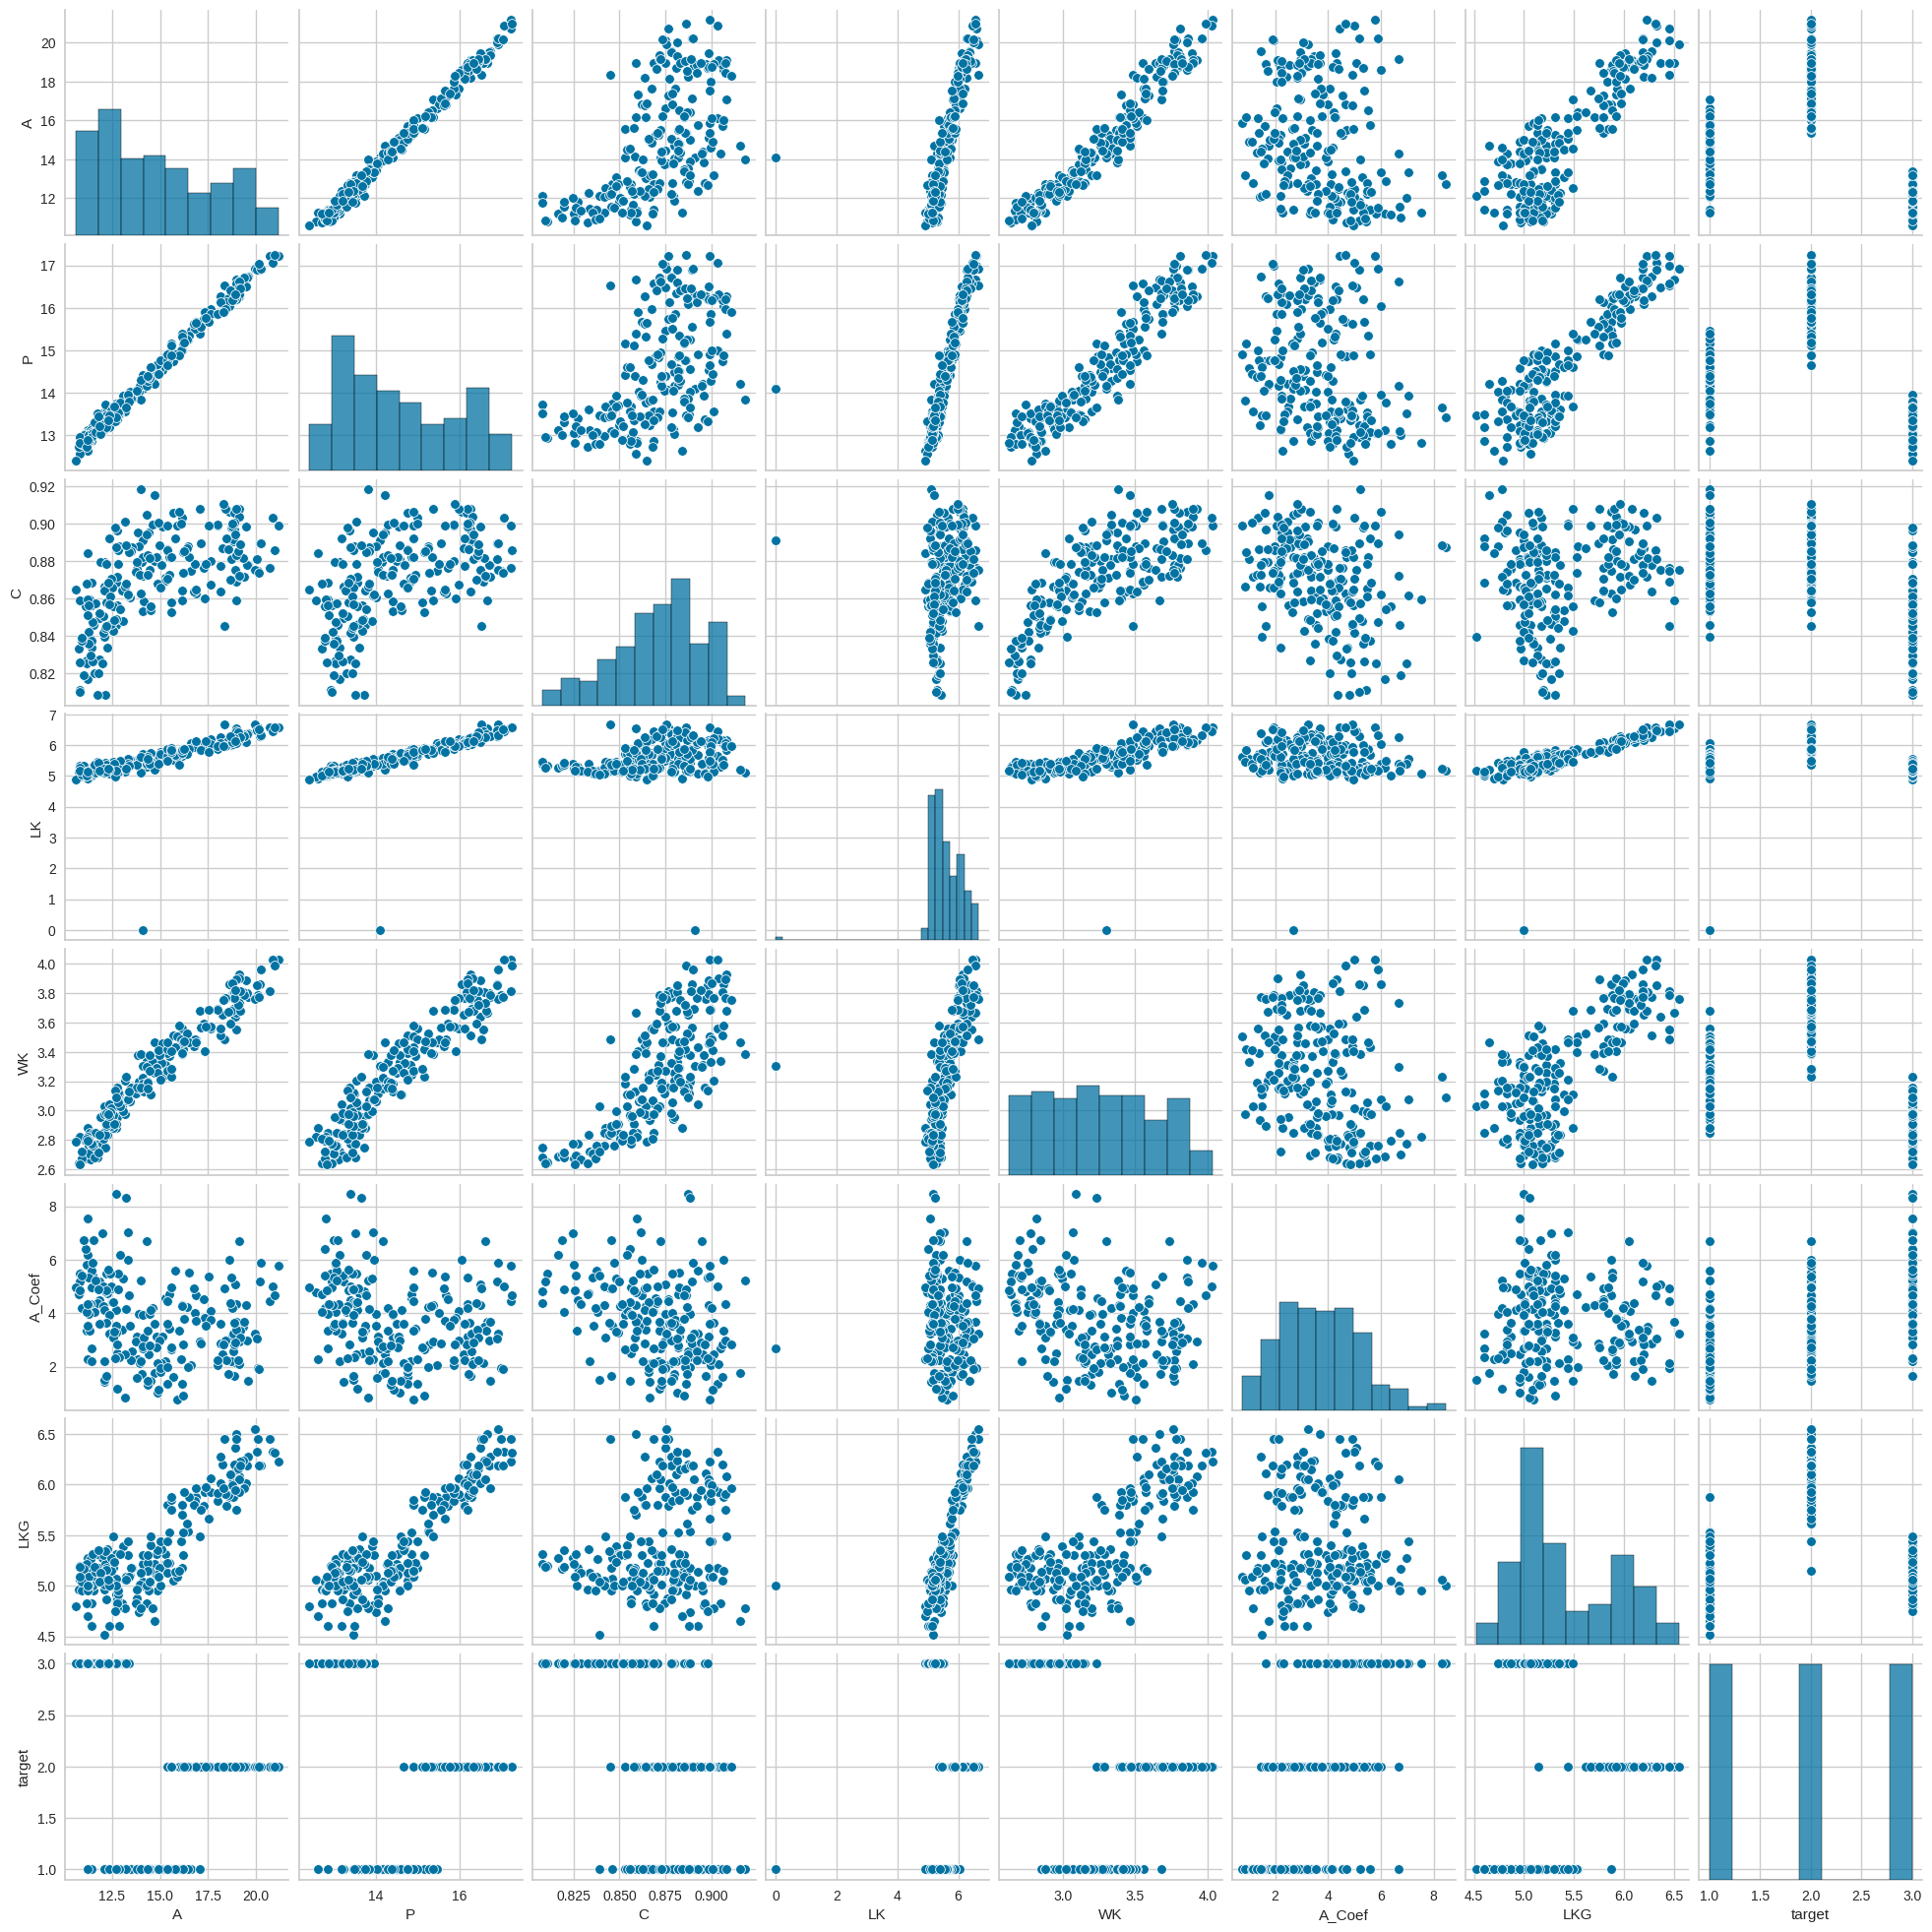

In [ ]:
sns.pairplot(data)

<Axes: >

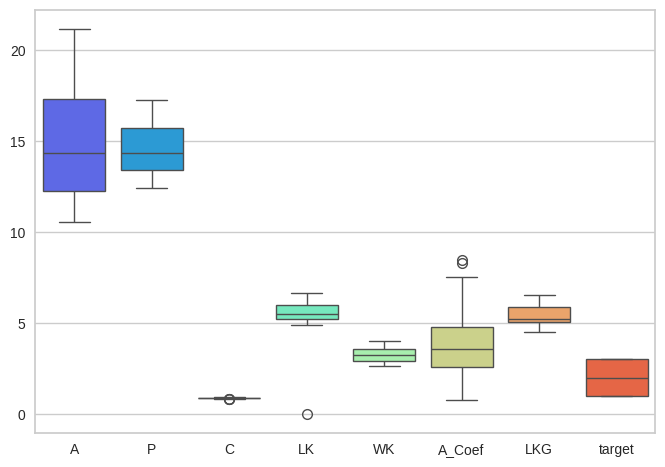

In [ ]:
sns.boxplot(data=data,palette='rainbow')

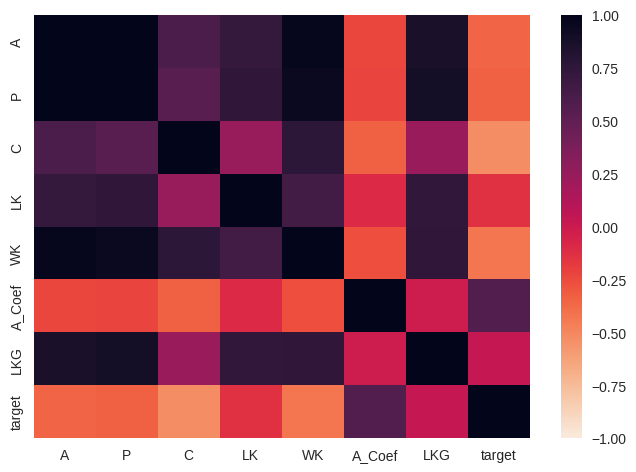

In [ ]:
#import seaborn as sns

sns.heatmap(data.corr(), vmin=-1, vmax=1,
annot=False,cmap="rocket_r")
plt.show()

<Axes: xlabel='LK', ylabel='count'>

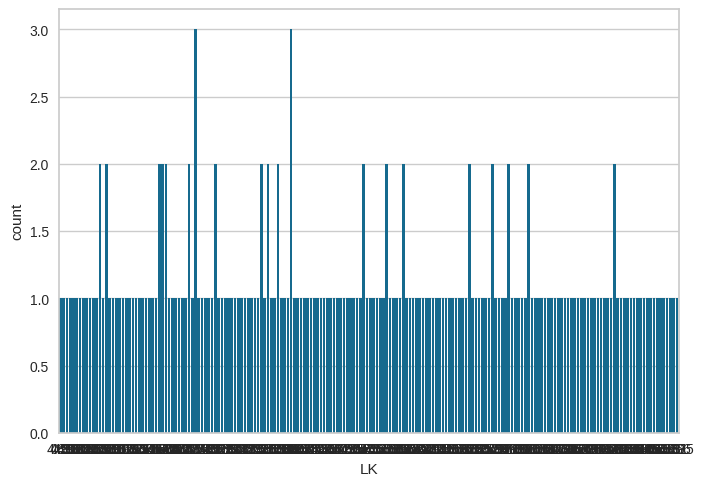

In [ ]:
sns.countplot(data=data, x= "LK" )

<Axes: ylabel='LK'>

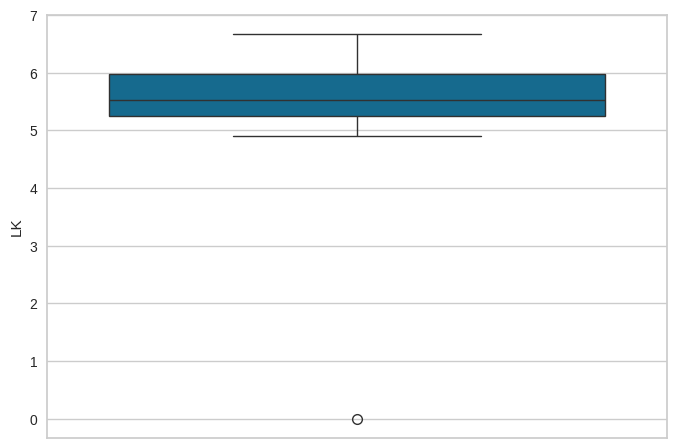

In [ ]:
sns.boxplot(data=data, y="LK", )

<Axes: ylabel='A_Coef'>

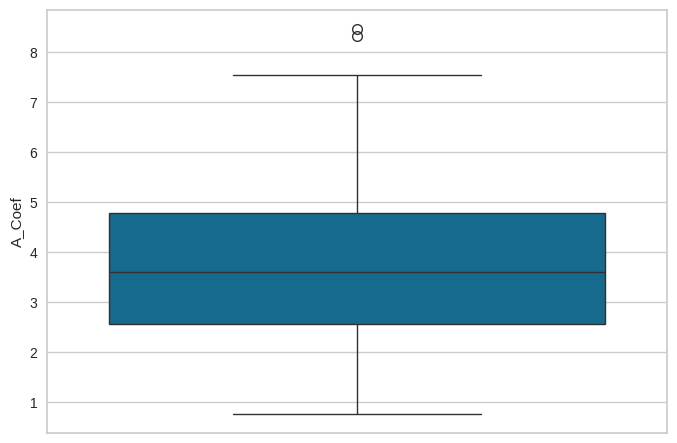

In [ ]:
sns.boxplot(data=data, y="A_Coef", )

<Axes: xlabel='LK'>

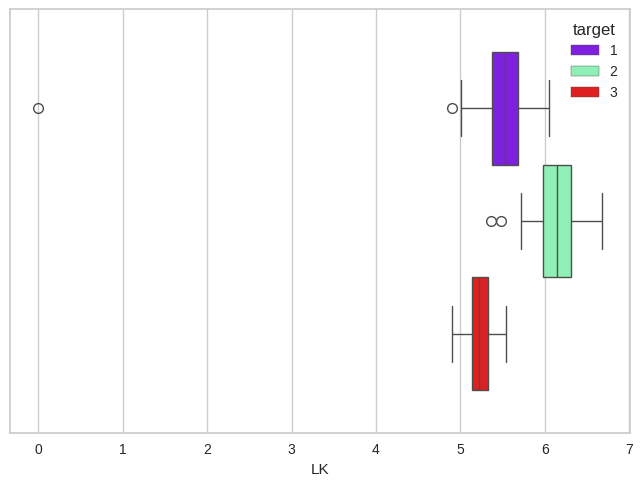

In [ ]:
sns.boxplot(x="LK", hue="target",data=data,palette='rainbow')

<Axes: xlabel='A', ylabel='P'>

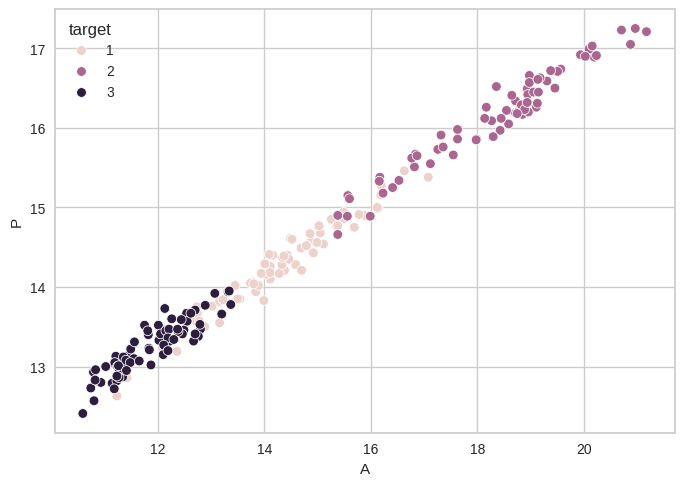

In [ ]:
sns.scatterplot (data=data, x= "A", y="P", hue="target")

<Axes: xlabel='LK', ylabel='WK'>

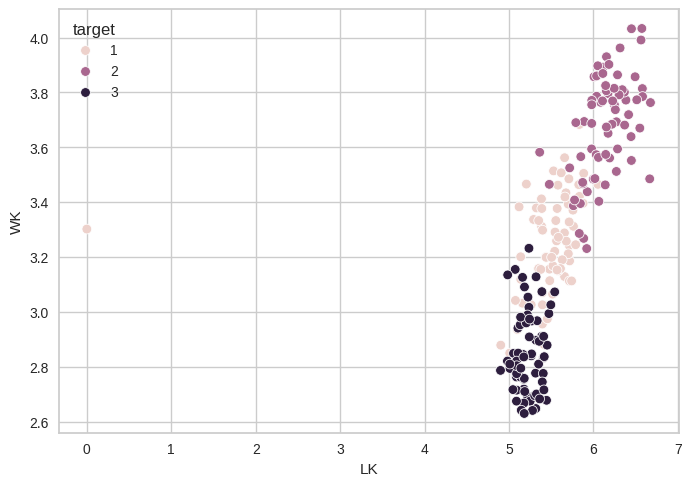

In [ ]:
sns.scatterplot (data=data, x= "LK", y="WK", hue="target")

<Axes: xlabel='LKG', ylabel='A_Coef'>

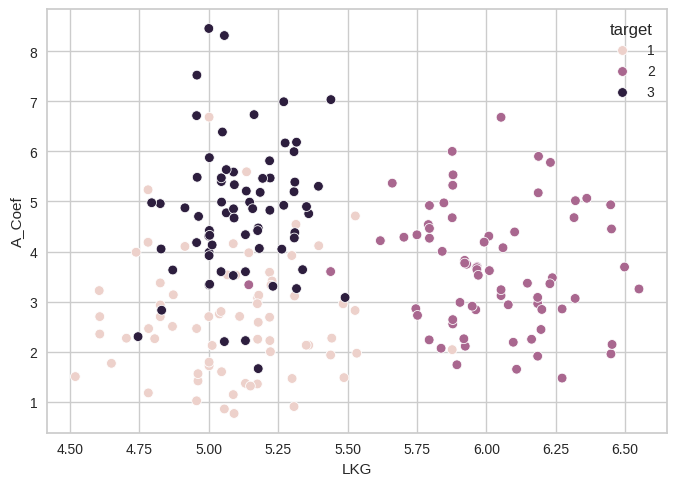

In [ ]:
sns.scatterplot (data=data, x= "LKG", y="A_Coef", hue="target")

In [ ]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,NaN,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,0.000,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


==============================================

### Tratamiento de datos

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


In [ ]:
data.P = imp.fit_transform(data['P'].values.reshape(-1,1))

In [ ]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.840000,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.570000,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.561531,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.940000,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.990000,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.210000,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.490000,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.100000,0.8911,0.000,3.302,2.700,5.000,1
8,16.63,15.460000,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.250000,0.8880,5.884,3.505,1.969,5.533,1


In [ ]:
errordata= data[data['LK'] == 0]

In [ ]:
errordata

,A,P,C,LK,WK,A_Coef,LKG,target
7,14.11,14.1,0.8911,0.0,3.302,2.7,5.0,1


In [ ]:
#data.LK = data.LK.replace({0: 5.602724})

In [ ]:
data.LK = data.LK.replace({0: data['LK'].mean()})

In [ ]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.840000,0.8710,5.763000,3.312,2.221,5.220,1
1,14.88,14.570000,0.8811,5.554000,3.333,1.018,4.956,1
2,14.29,14.561531,0.9050,5.291000,3.337,2.699,4.825,1
3,13.84,13.940000,0.8955,5.324000,3.379,2.259,4.805,1
4,16.14,14.990000,0.9034,5.658000,3.562,1.355,5.175,1
5,14.38,14.210000,0.8951,5.386000,3.312,2.462,4.956,1
6,14.69,14.490000,0.8799,5.563000,3.259,3.586,5.219,1
7,14.11,14.100000,0.8911,5.602724,3.302,2.700,5.000,1
8,16.63,15.460000,0.8747,6.053000,3.465,2.040,5.877,1
9,16.44,15.250000,0.8880,5.884000,3.505,1.969,5.533,1


In [ ]:
#data.drop([7], axis=0, inplace=True)

In [ ]:
data.shape

(210, 8)

In [ ]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.840000,0.8710,5.763000,3.312,2.221,5.220,1
1,14.88,14.570000,0.8811,5.554000,3.333,1.018,4.956,1
2,14.29,14.561531,0.9050,5.291000,3.337,2.699,4.825,1
3,13.84,13.940000,0.8955,5.324000,3.379,2.259,4.805,1
4,16.14,14.990000,0.9034,5.658000,3.562,1.355,5.175,1
5,14.38,14.210000,0.8951,5.386000,3.312,2.462,4.956,1
6,14.69,14.490000,0.8799,5.563000,3.259,3.586,5.219,1
7,14.11,14.100000,0.8911,5.602724,3.302,2.700,5.000,1
8,16.63,15.460000,0.8747,6.053000,3.465,2.040,5.877,1
9,16.44,15.250000,0.8880,5.884000,3.505,1.969,5.533,1


==========================================================

==================================

### Separar variables a utilizar para algritmos no supervisados

In [ ]:
features = data.iloc[:, 0:7]
target = data.iloc[:, -1]

In [ ]:
features.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.840000,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.570000,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.561531,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.940000,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.990000,0.9034,5.658,3.562,1.355,5.175


==========================================

### Normalizar datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_Norm= scaler.fit_transform(features)


Se necesita pasar la matriz a dataframe

In [ ]:
data_Norm = pd.DataFrame(data_Norm, columns=features.columns)

In [ ]:
data_Norm.describe()

,A,P,C,LK,WK,A_Coef,LKG
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444531,0.570767,0.411263,0.448043,0.381633,0.437751
std,0.274759,0.269742,0.214423,0.249342,0.269219,0.195498,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.442831,0.204533,0.223806,0.233575,0.258986
50%,0.355524,0.402893,0.593013,0.357545,0.432644,0.368474,0.346627
75%,0.634089,0.682851,0.723004,0.608530,0.664113,0.520570,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
MinMaxScaler scales all the data features in the range [0, 1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
data_Norm1= scaler1.fit_transform(features)

In [ ]:
data_Norm1 = pd.DataFrame(data_Norm1, columns=features.columns)

In [ ]:
data_Norm1.describe()

,A,P,C,LK,WK,A_Coef,LKG
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-3.383537e-16,1.556427e-15,1.285744e-15,-2.588406e-15,-3.383537e-16,-3.383537e-16,-8.987520e-17
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.651922e+00,-2.668236e+00,-1.653335e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.534214e-01,-5.980791e-01,-8.310856e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.547334e-01,1.039927e-01,-2.159545e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.856208e-01,7.116771e-01,7.930416e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.064177e+00,2.006586e+00,2.366804e+00,2.055112e+00,3.170590e+00,2.328998e+00


===========================================

### Reducción dimensionalidad PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
data_PCA= pca.fit_transform(data_Norm1)    #preferible utilizar datos normalizados con StandarScaler

In [ ]:
data_PCA[:10,]

array([[ 3.15956063e-01,  7.85873050e-01, -6.28692668e-01,
         4.15889264e-01, -1.04182634e-01,  1.95218036e-02,
         1.35393703e-02],
       [-3.92525197e-03,  1.91558512e+00, -6.65193470e-01,
         4.29765573e-01,  4.91201351e-02,  2.17724894e-02,
         1.64251881e-03],
       [-3.00026745e-01,  1.87671704e+00,  9.15832339e-01,
         2.14491204e-01,  6.72534710e-02, -2.32931977e-01,
         2.26931002e-01],
       [-5.92425874e-01,  1.93118792e+00,  5.03701540e-01,
         2.24147078e-01,  7.28663934e-02,  2.33469623e-01,
         1.73813302e-02],
       [ 1.10269036e+00,  2.06794731e+00,  6.10014380e-02,
         1.38285196e-01,  2.14220415e-02,  5.54017462e-02,
        -1.37206687e-03],
       [-3.37449577e-01,  1.63706619e+00,  4.42801072e-01,
         9.44822596e-02, -1.86471079e-03, -2.04969214e-02,
         2.70469831e-03],
       [-1.46890318e-01,  4.36810563e-01,  3.03549792e-01,
         1.10868721e-01, -6.79159009e-02, -6.20693193e-02,
         1.9023149

<Axes: title={'center': 'PCA'}>

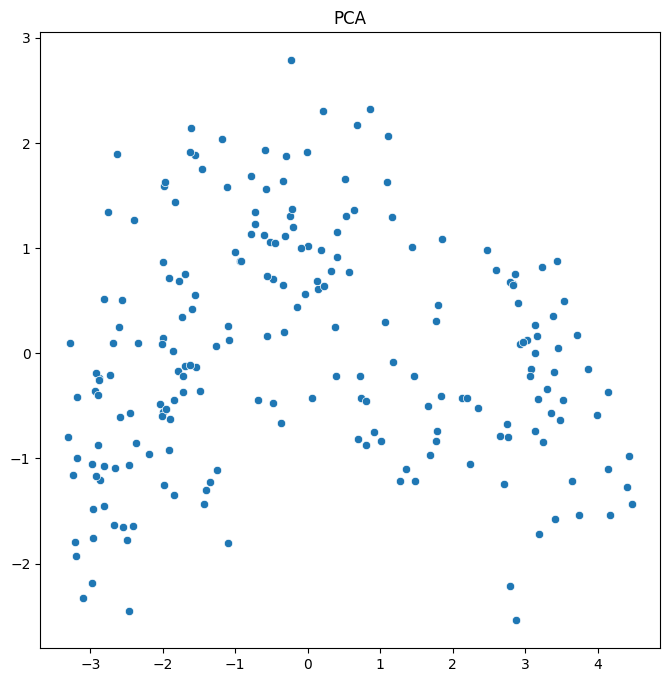

In [ ]:
plt.figure(figsize=(8,8))
plt.title("PCA")
sns.scatterplot(x=data_PCA[:,0],y=data_PCA[:,1])

In [ ]:
print(pca.explained_variance_ratio_)

[7.18802002e-01 1.70856808e-01 9.67926605e-02 9.80963971e-03
 2.76821119e-03 8.16399373e-04 1.54279229e-04]


Text(0, 0.5, 'Cumulative explained variables')

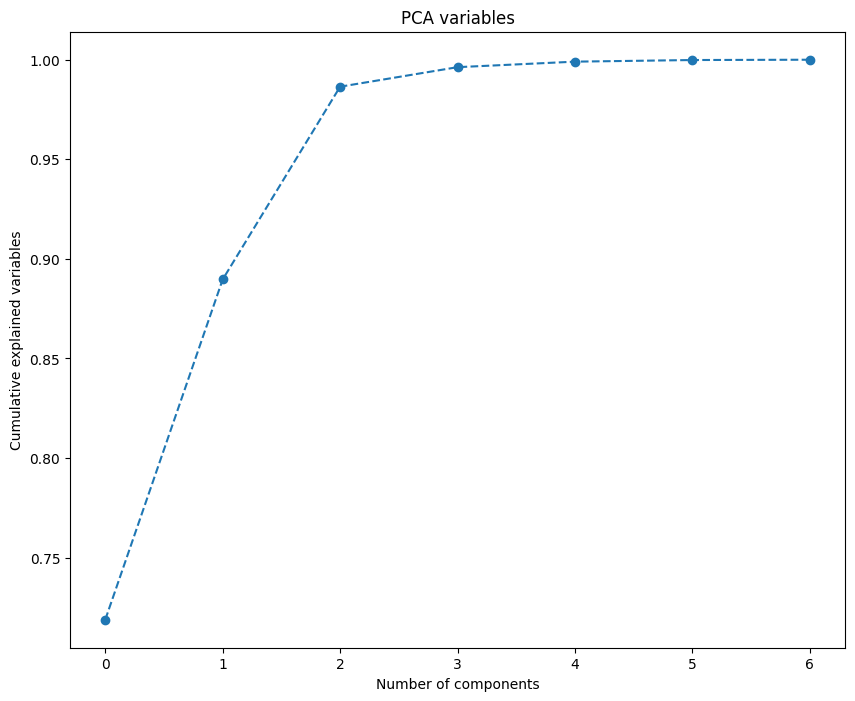

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o',linestyle = '--')
plt.title('PCA variables')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variables')

In [ ]:
pca = PCA(n_components= 2)
data_PCA= pca.fit_transform(data_Norm1)

In [ ]:
print(pca.explained_variance_ratio_)

[0.718802   0.17085681]


================= Método del codo para identificar K

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
distortions = []
sill = []
K = range(1,20)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(data_Norm1)
    distortions.append(kmeansModel.inertia_)
  # sill.append(metrics.silhouette_score(data_CX, kmeanModel.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

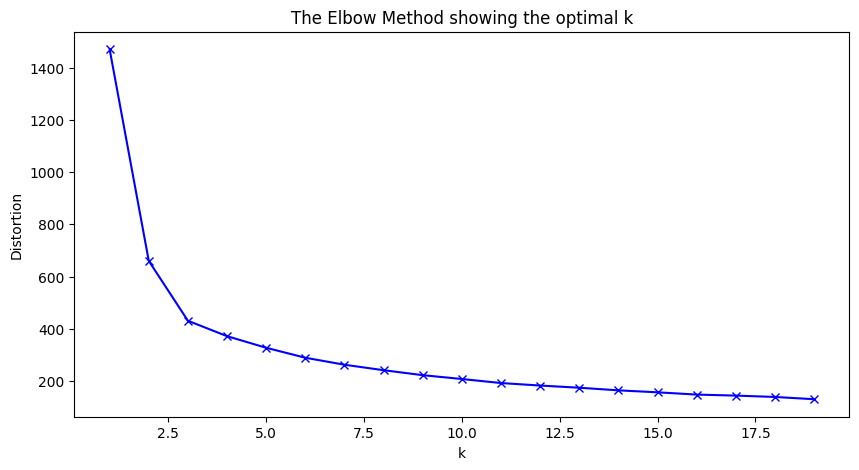

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

===============

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

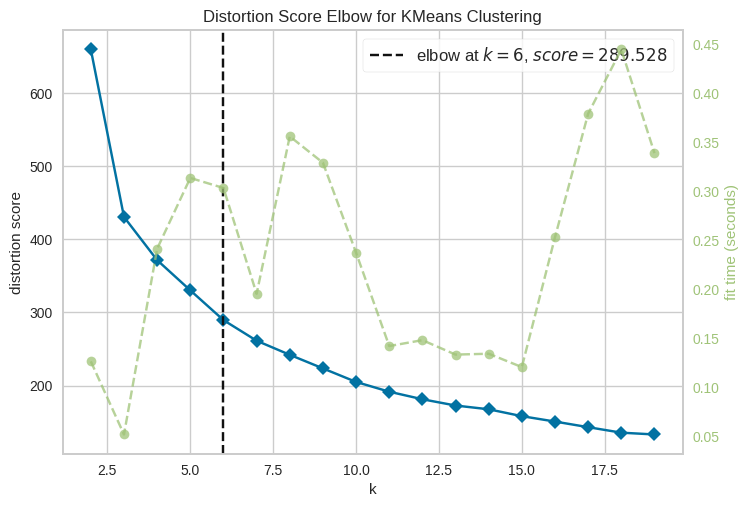

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#https://www.kaggle.com/code/residentmario/ml-visualization-with-yellowbrick-3

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import numpy as np

vzr = KElbowVisualizer(KMeans(), k=(2, 20))
vzr.fit(data_Norm1)
vzr.poof()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


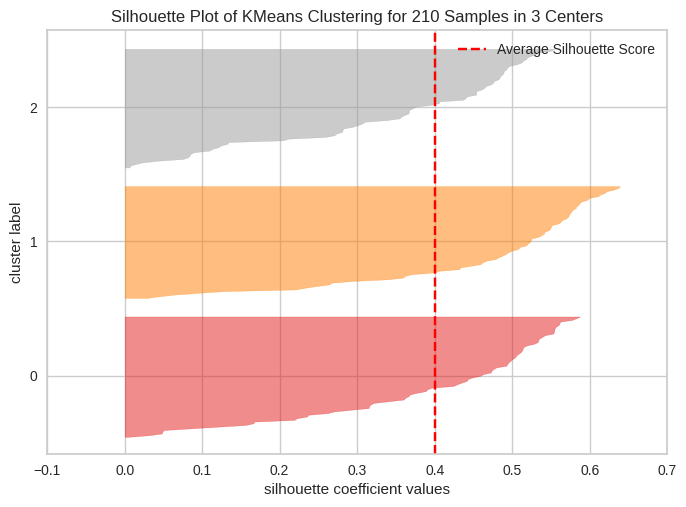

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 210 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#https://www.kaggle.com/code/residentmario/ml-visualization-with-yellowbrick-3

from yellowbrick.cluster import SilhouetteVisualizer

clf = KMeans(n_clusters=3)
vzr = SilhouetteVisualizer(clf)
vzr.fit(data_Norm1)
vzr.poof()



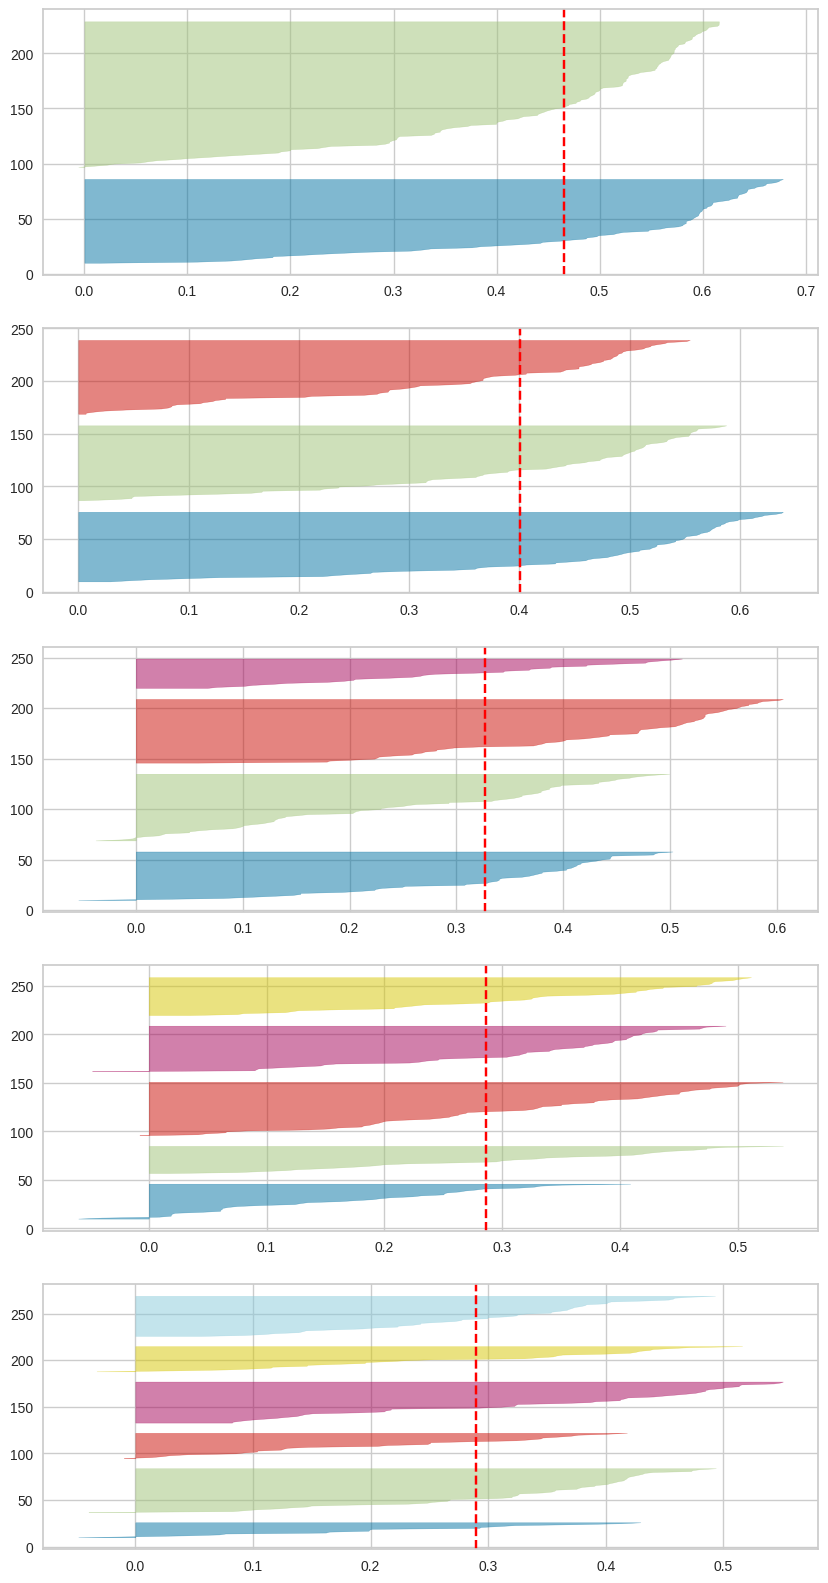

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 1, figsize=(10,20))
j=0
for i in [2, 3, 4, 5, 6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[j])
    j=j+1
    #visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(data_Norm1)



Eliger la grafica que disfribuya mejor los objetos K = 3

=================
##KMEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

### Método del codo

In [ ]:
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42).fit(data_Norm)
    inercia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

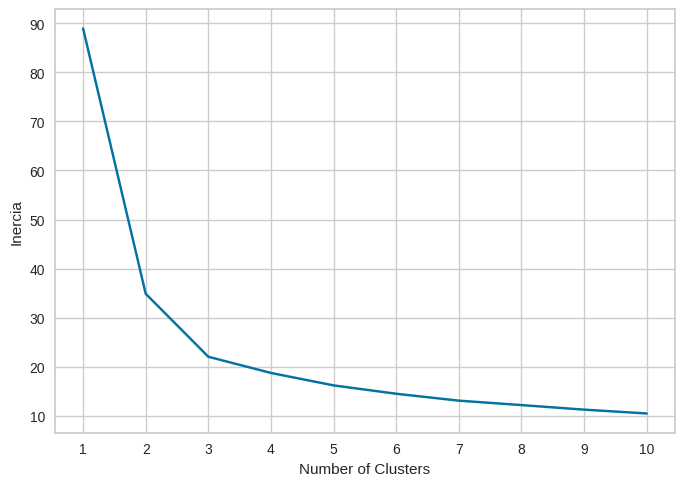

In [ ]:
plt.plot(range(1, 11), inercia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inercia")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

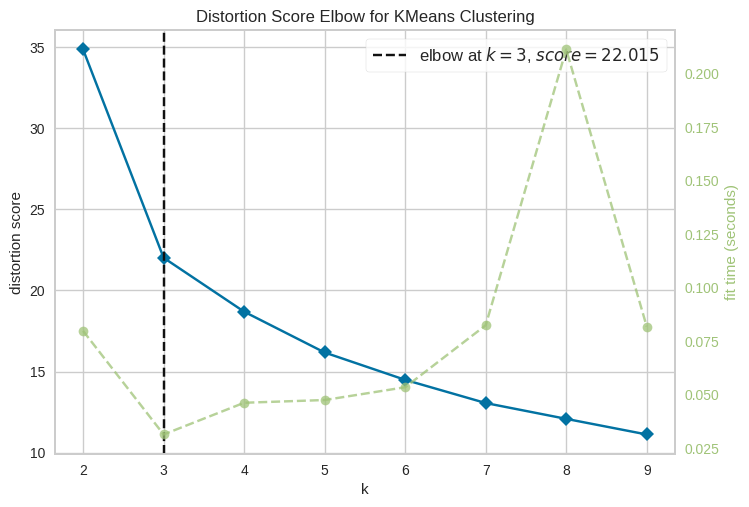

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import numpy as np

vzr = KElbowVisualizer(KMeans(), k=(2, 10))
vzr.fit(data_Norm)
vzr.poof()

In [ ]:
cl_kmeans = KMeans(n_clusters =3, random_state = 42).fit(data_Norm)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_Norm, cl_kmeans.labels_))

Silhouette Coefficient: 0.422


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    silhouette_score (sklearn.metrics) for the data set is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.
    silhouette_samples (sklearn.metrics) provides the Silhouette scores for each sample of different clusters.

In [ ]:
print(cl_kmeans.labels_)

[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 2 0 2 2 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1]


In [ ]:
silhouette_values_KM = metrics.silhouette_samples(data_Norm, cl_kmeans.labels_)

means_lst1 = []
for label in range(3):
    means_lst1.append(silhouette_values_KM[cl_kmeans.labels_ == label].mean())

In [ ]:
print (means_lst1)

[0.5023074000769192, 0.4162224701752593, 0.3550732016182617]


In [ ]:
import collections
print(collections.Counter(cl_kmeans.labels_))

Counter({1: 77, 2: 69, 0: 64})


Código para resumir las medias de las columnas por cada grupo de clusters

Primero añadir la columna clase en el DataFrame data_sin_normalizar

In [ ]:
data_sin_normalizar1 = features.copy()

In [ ]:
data_sin_normalizar1['Class'] = cl_kmeans.labels_

In [ ]:
data_sin_normalizar1.shape

(210, 8)

In [ ]:
data_sin_normalizar1.head(11)

,A,P,C,LK,WK,A_Coef,LKG,Class
0,15.26,14.840000,0.8710,5.763000,3.312,2.221,5.220,2
1,14.88,14.570000,0.8811,5.554000,3.333,1.018,4.956,2
2,14.29,14.561531,0.9050,5.291000,3.337,2.699,4.825,2
3,13.84,13.940000,0.8955,5.324000,3.379,2.259,4.805,2
4,16.14,14.990000,0.9034,5.658000,3.562,1.355,5.175,2
5,14.38,14.210000,0.8951,5.386000,3.312,2.462,4.956,2
6,14.69,14.490000,0.8799,5.563000,3.259,3.586,5.219,2
7,14.11,14.100000,0.8911,5.602724,3.302,2.700,5.000,2
8,16.63,15.460000,0.8747,6.053000,3.465,2.040,5.877,0
9,16.44,15.250000,0.8880,5.884000,3.505,1.969,5.533,2


In [ ]:
data_resumen1= pd.DataFrame(data= None, columns= data_sin_normalizar1.columns)
data_resumen1.head()

,A,P,C,LK,WK,A_Coef,LKG,Class


In [ ]:
data_group1=data_sin_normalizar1.groupby(['Class'])


In [ ]:
for group in range(3):
    data_resumen1 = data_resumen1.append(pd.DataFrame(data_group1.get_group(group).mean().to_dict(),index=[data_sin_normalizar1.index.values[-1]]))

<ipython-input-113-1300e90d1789>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_resumen1 = data_resumen1.append(pd.DataFrame(data_group1.get_group(group).mean().to_dict(),index=[data_sin_normalizar1.index.values[-1]]))
<ipython-input-113-1300e90d1789>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_resumen1 = data_resumen1.append(pd.DataFrame(data_group1.get_group(group).mean().to_dict(),index=[data_sin_normalizar1.index.values[-1]]))
<ipython-input-113-1300e90d1789>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_resumen1 = data_resumen1.append(pd.DataFrame(data_group1.get_group(group).mean().to_dict(),index=[data_sin_normalizar1.index.values[-1]]))


In [ ]:
data_resumen1

,A,P,C,LK,WK,A_Coef,LKG,Class
209,18.610156,16.251719,0.884600,6.195547,3.709609,3.592094,6.056656,0.0
209,11.896104,13.257662,0.849775,5.230597,2.858026,4.599545,5.086234,1.0
209,14.651159,14.448863,0.882067,5.549329,3.287304,2.796858,5.165638,2.0


==========================

==================================


### Clusterizacion jerarquicos


El criterio de vinculación determina qué distancia utilizar entre conjuntos de observación. El algoritmo fusionará los pares de clusters que minimicen este criterio. predeterminado = 'ward'

'ward' minimiza la variación de los grupos que se fusionan.

'promedio' utiliza el promedio de las distancias de cada observación de los dos conjuntos.

El vínculo "completo" o "máximo" utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.

'único' utiliza el mínimo de distancias entre todas las observaciones de los dos conjuntos.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn import metrics

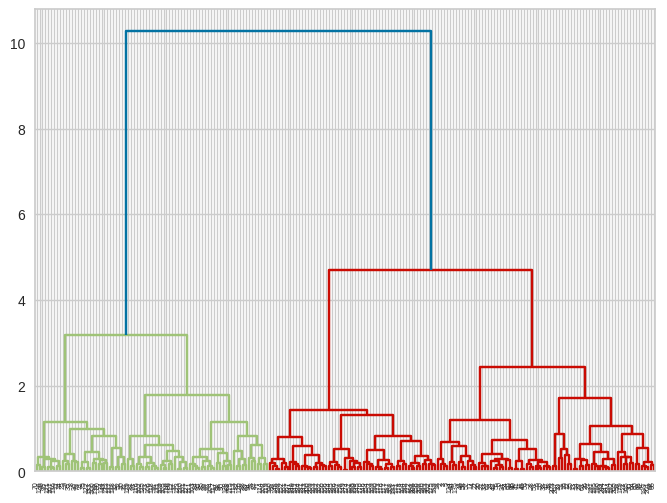

In [ ]:
clusters = hierarchy.linkage(data_Norm, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)


In [ ]:
cl_JERARQUICO = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data_Norm)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_Norm, cl_JERARQUICO.labels_))

Silhouette Coefficient: 0.390


In [ ]:
import collections
print(collections.Counter(cl_JERARQUICO.labels_))

Counter({0: 79, 1: 74, 2: 57})


In [ ]:
silhouette_values_jerarquico = metrics.silhouette_samples(data_Norm, cl_JERARQUICO.labels_)

means_lst3 = []
for label in range(3):
    means_lst3.append(silhouette_values_jerarquico[cl_JERARQUICO.labels_ == label].mean())


In [ ]:
print(means_lst3)

[0.4350007651838752, 0.2754456765014725, 0.47480580567516983]


<Axes: xlabel='A', ylabel='P'>

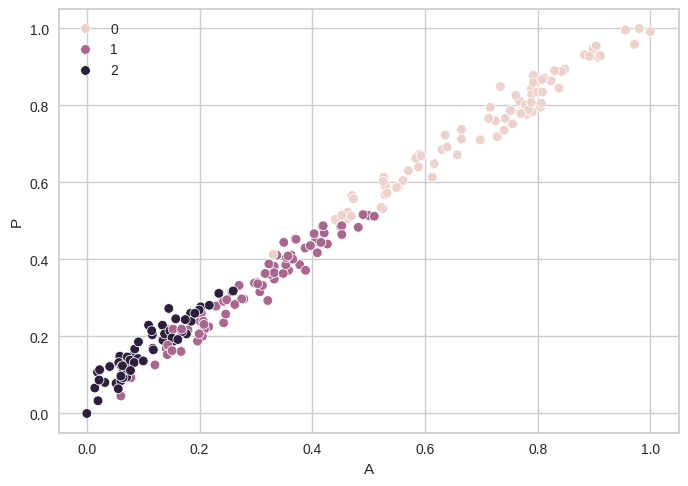

In [ ]:
sns.scatterplot(data= data_Norm, x= data_Norm.iloc[: , 0], y=data_Norm.iloc[:,1], hue=cl_JERARQUICO.labels_)


In [ ]:
cl_JERARQUICO.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2])

NOTA: Utilizar el codigo indicado en kmeans para identificar los detalles de los grupos encontrados basados en la data antes de normalizar


# **NOTA: Como la agrupación divisiva no se utiliza en muchos lugares, no hay ninguna clase/función predefinida en ninguna biblioteca de Python.**

